<a href="https://colab.research.google.com/github/imenebak/Tp_traitement_images/blob/master/disparity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
a = !wget http://vision.middlebury.edu/stereo/data/scenes2005/FullSize/Art/Illum3/Exp1/view5.png
a = !wget http://vision.middlebury.edu/stereo/data/scenes2005/FullSize/Art/Illum3/Exp1/view0.png


In [0]:
import numpy as np
import cv2



image_1 = cv2.imread("view5.png")
image_2 = cv2.imread("view0.png")

left_img= cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
right_img= cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)


x,y=left_img.shape
v,w=right_img.shape

DisparityMatrix_left=np.zeros(left_img.shape, np.uint8)
DisparityMatrix_right=np.zeros(right_img.shape, np.uint8)


OcclusionCost = 20 #(You can adjust this, depending on how much threshold you want to give for noise)

#For Dynamic Programming you have build a cost matrix. Its dimension will be numcols x numcols
for all_rows in range (0,x):
    #print all_rows
    CostMatrix=np.zeros((y,y))
    
    DirectionMatrix = np.zeros((y,y))  #(This is important in Dynamic Programming. You need to know which direction you need traverse)
    
    #We first populate the first row and column values of Cost Matrix
    
    for i in range(0,y):
        CostMatrix[i,0] = i*OcclusionCost
        CostMatrix[0,i] = i*OcclusionCost
        
        #print np.abs((left_img[all_rows,0]-right_img[all_rows,0]))
    
    for i in range(0,y):
        for j in range (0,y):
            min1=CostMatrix[i-1,j-1]+np.abs((int(left_img[all_rows,i])-int(right_img[all_rows,j])))
            min2=CostMatrix[i-1,j]+OcclusionCost
            min3=CostMatrix[i,j-1]+OcclusionCost
            cmin=np.min((min1,min2,min3))
            
            CostMatrix[i,j]=cmin
            if min1==cmin:
                DirectionMatrix[i,j]=1
            if min2==cmin:
                DirectionMatrix[i,j]=2
            if min3==cmin:
                DirectionMatrix[i,j]=3
                   
        #print DirectionMatrix
        # Now, its time to populate the whole Cost Matrix and DirectionMatrix
        
        # Use the pseudocode from "A Maximum likelihood Stereo Algorithm" paper given as reference
        p=y-1
        q=y-1
        
        #print q
        #print p

    while ((p!=0) and (q!=0)):
        #print "Values for direction matrix"
        #print(DirectionMatrix[p,q])
        if DirectionMatrix[p,q]==1:
            #print("inside 1")
            DisparityMatrix_left[all_rows,p]=np.abs(p-q)
            DisparityMatrix_right[all_rows,q]=np.abs(p-q)
            p=p-1
            q=q-1
            
        elif DirectionMatrix[p,q]==2:
            #print("inside 2")
            p=p-1
            # DisparityMatrix_left[all_rows,p]=np.abs(p-q)
            
           
        elif DirectionMatrix[p,q]==3:
            #print("inside 3")
            q=q-1
            # DisparityMatrix_right[all_rows,q]=np.abs(p-q)
           
            
    
    #print "Left"
    #print DisparityMatrix_left
    #print "Right"
    #print DisparityMatrix_right
    
print (DisparityMatrix_left)
print ("###################")
print (DisparityMatrix_right)

  
cv2.imshow("left image",DisparityMatrix_left)
cv2.imshow("right image",DisparityMatrix_right)  
             
cv2.imwrite('img_L_DP.png',DisparityMatrix_left)
cv2.imwrite('img_R_DP.png',DisparityMatrix_right)
print ("done")

KeyboardInterrupt: ignored

In [0]:
import numpy as np
import cv2


image_1 = cv2.imread('view0.png')
image_2= cv2.imread('view5.png')
left_img= cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
right_img= cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)
#cv2.imwrite('view1_gray.png',left_img)
#cv2.imwrite('view5_gray.png',right_img)

x,y=left_img.shape
v,w=right_img.shape
print ("left image dimension",x,y)
print ("right image dimension",v,w)

DisparityMatrix_left=np.zeros(left_img.shape, np.uint8)
DisparityMatrix_right=np.zeros(right_img.shape, np.uint8)
DisparityMatrix_left.astype(int)
DisparityMatrix_right.astype(int)

#Disparité pour Image de gauche

threshold = 20 

#la dimension :numcols x numcols
for all_rows in range (0,x):
    #print (all_rows)
    CostMatrix=np.zeros((y,y))
    
    DirectionMatrix = np.zeros((y,y))  
    
    #on comence par les valeurs de la premiere row et column 
    
    for i in range(0,y):
        CostMatrix[i,0] = i*threshold
        CostMatrix[0,i] = i*threshold
        
        
    
    for i in range(0,y):
        for j in range (0,y):
            min1=CostMatrix[i-1,j-1]+np.abs((int(left_img[all_rows,i])-int(right_img[all_rows,j])))
            min2=CostMatrix[i-1,j]+threshold
            min3=CostMatrix[i,j-1]+threshold
            cmin=np.min((min1,min2,min3))
            
            CostMatrix[i,j]=cmin
            if min1==cmin:
                DirectionMatrix[i,j]=1
            if min2==cmin:
                DirectionMatrix[i,j]=2
            if min3==cmin:
                DirectionMatrix[i,j]=3
                   

        p=y-1
        q=y-1
        
       

    while ((p!=0) and (q!=0)):
        #print ("Values for direction matrix")
        #print(DirectionMatrix[p,q])
        if DirectionMatrix[p,q]==1:
            #print("inside 1")
            DisparityMatrix_left[all_rows,p]=np.abs(p-q)
            DisparityMatrix_right[all_rows,q]=np.abs(p-q)
            p=p-1
            q=q-1
            
        elif DirectionMatrix[p,q]==2:
            #print("inside 2")
            p=p-1
            DisparityMatrix_left[all_rows,p]=np.abs(p-q)
            
           
        elif DirectionMatrix[p,q]==3:
            #print("inside 3")
            q=q-1
            DisparityMatrix_right[all_rows,q]=np.abs(p-q)
           
            
    
    #print ("Left")
    #print (DisparityMatrix_left)
    #print ("Right")
    #print (DisparityMatrix_right)
    
print (DisparityMatrix_left)
print ("###################")
print (DisparityMatrix_right)

  
cv2.imshow("left image",DisparityMatrix_left)
cv2.imshow("right image",DisparityMatrix_right)  
             
cv2.imwrite('img_L_DP.png',DisparityMatrix_left)
cv2.imwrite('img_R_DP.png',DisparityMatrix_right)
print ("done")


   
def mean_square_error(disparity_map, ground_truth):

    mse = np.mean((disparity_map - ground_truth)**2)
    return mse

def mean_abs_error(disparity_map, ground_truth):

    mse = np.mean(abs(disparity_map - ground_truth))
    return mse

def mean_sqrt_error(disparity_map, ground_truth):

    mse = (np.mean(disparity_map - ground_truth))/(np.mean(np.sqrt(disparity_map - ground_truth)))
    return mse    
    
    
    # Mean Squared Error
ground_truth_1 = cv2.imread('disp1.png', cv2.IMREAD_GRAYSCALE)
ground_truth_2 = cv2.imread('disp5.png', cv2.IMREAD_GRAYSCALE)

mse_9_lr = mean_square_error(DisparityMatrix_left, ground_truth_1)
print('mesure block de 9 ', mse_9_lr)

mse_9_rl = mean_square_error(DisparityMatrix_right, ground_truth_2)
print('mesure block de 9 ', mse_9_rl)
    



mse_9_lr = mean_abs_error(DisparityMatrix_left, ground_truth_1)
print('mesure abs block de 9 ', mse_9_lr)

mse_9_rl = mean_abs_error(DisparityMatrix_right, ground_truth_2)
print('mesure abs block de 9 ', mse_9_rl)
    




mse_9_lr = mean_sqrt_error(DisparityMatrix_left, ground_truth_1)
print('mesure sqrt block de 9 ', mse_9_lr)

mse_9_rl = mean_abs_error(DisparityMatrix_right, ground_truth_2)
print('mesure sqrt block de 9 ', mse_9_rl)


left image dimension 1110 1390
right image dimension 1110 1390


KeyboardInterrupt: ignored

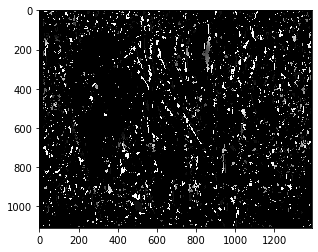

'https://robotacademy.net.au/lesson/computing-disparity/'

In [0]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
imgL = cv.imread('view0.png',0)
imgR = cv.imread('view5.png',0)
stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
disparity1 = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()

"""https://albertarmea.com/post/opencv-stereo-camera/"""
"""https://robotacademy.net.au/lesson/computing-disparity/"""


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
from google.colab import files 
uploaded = files.upload() 
